In [65]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sompy

**SOM**

**Cargamos los Datos**

In [66]:
data = pd.read_csv("./test.csv")

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [68]:
data= data.drop(['Gender','Customer Type','Type of Travel','Class','satisfaction'],axis=1)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Flight Distance                    25976 non-null  int64  
 4   Inflight wifi service              25976 non-null  int64  
 5   Departure/Arrival time convenient  25976 non-null  int64  
 6   Ease of Online booking             25976 non-null  int64  
 7   Gate location                      25976 non-null  int64  
 8   Food and drink                     25976 non-null  int64  
 9   Online boarding                    25976 non-null  int64  
 10  Seat comfort                       25976 non-null  int64  
 11  Inflight entertainment             25976 non-null  int

In [80]:
data = data.dropna()

In [81]:
nombres=data.columns
valores=data.values
mapsize=[6,6]
som = sompy.SOMFactory.build(valores, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='random', neighborhood='gaussian', training='batch', name='sompy',component_names=nombres)  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=4, verbose='info')

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 1

 epoch: 1 ---> elapsed time:  0.059000, quantization error: 7.699818

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 1

 epoch: 1 ---> elapsed time:  0.054000, quantization error: 4.180596

 Final quantization error: 3.802217
 train took: 0.227000 seconds


In [82]:
topographic_error = som.calculate_topographic_error()
quantization_error = np.mean(som._bmu[1])
print ("Error topográfico = %s; Error de cuantificación = %s" % (topographic_error, quantization_error))

Error topográfico = 0.8804310045185958; Error de cuantificación = 3.8022169171092357


**Visualizacion**

**Mapa de visitas**

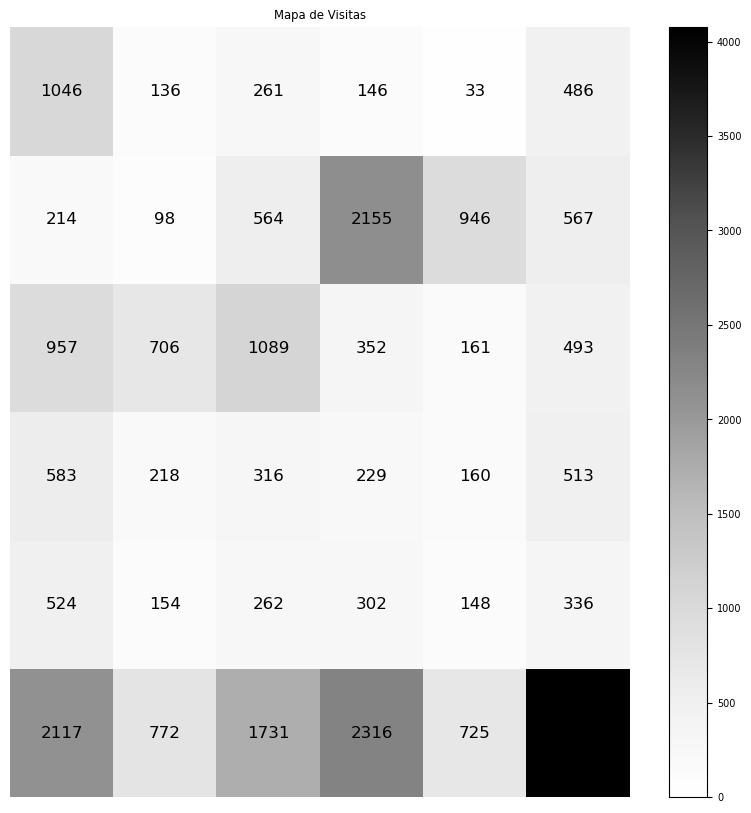

In [84]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Mapa de Visitas",text_size=7)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

**Agrupación K-Means**

In [85]:
mapsize = [5,5]
som = sompy.SOMFactory.build(valores, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='random', neighborhood='gaussian', training='batch', name='sompy',component_names=nombres)  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=100, verbose='info')

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 1

 epoch: 1 ---> elapsed time:  0.119000, quantization error: 12.161870

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 1

 epoch: 1 ---> elapsed time:  0.212000, quantization error: 4.161068

 Final quantization error: 3.755266
 train took: 0.730000 seconds


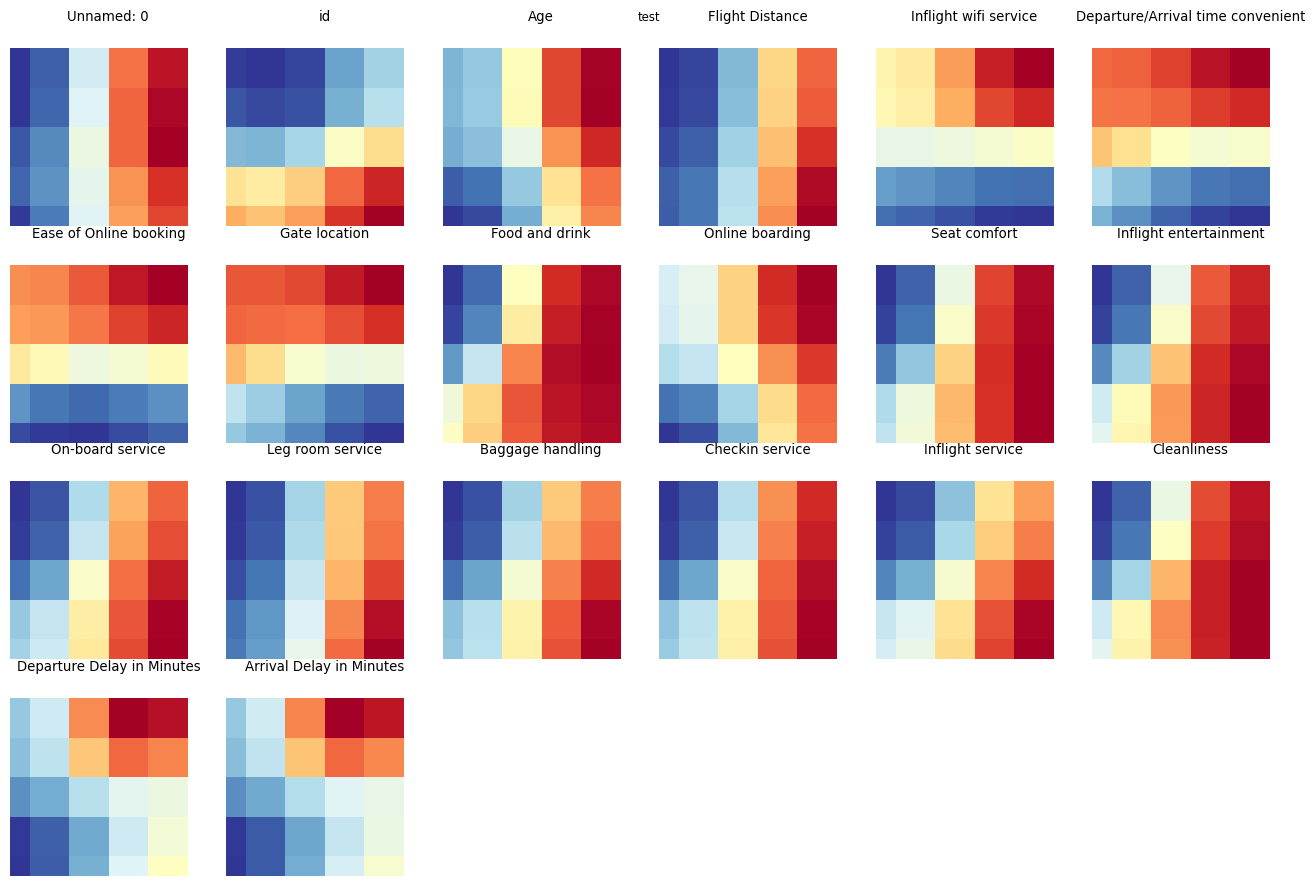

In [86]:
#som.cluster(4)
from sompy.visualization.mapview import View2DPacked
v = View2DPacked(5, 5, 'test',text_size=8)
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', cmap=None, col_sz=6)
# v.save('2d_packed_test')

**Mapa de Componentes**

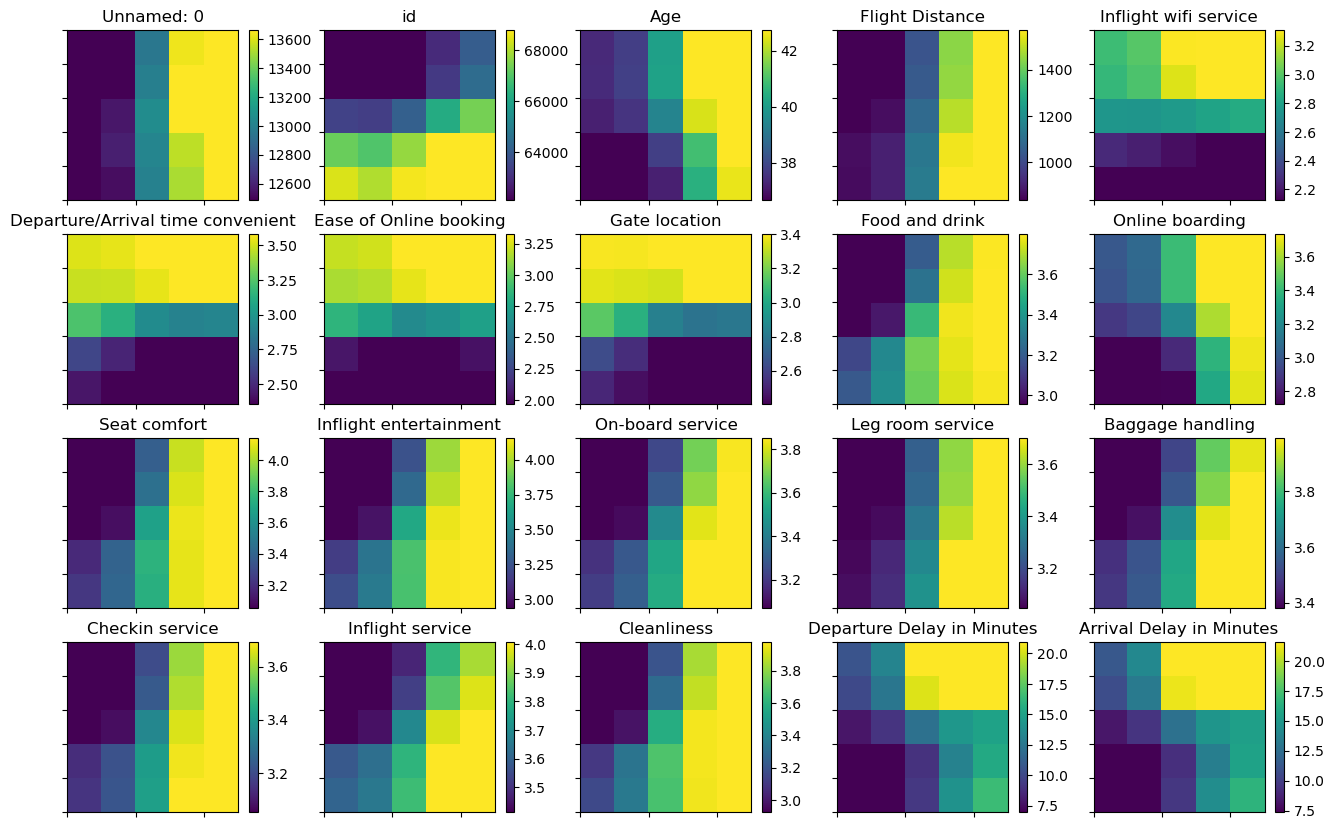

In [87]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(som, col_sz=5, which_dim="all", denormalize=True)

C:\Users\sland\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sland\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


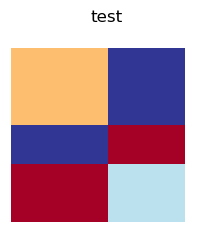

In [88]:
som.cluster(4)
v.show(som, what='cluster')

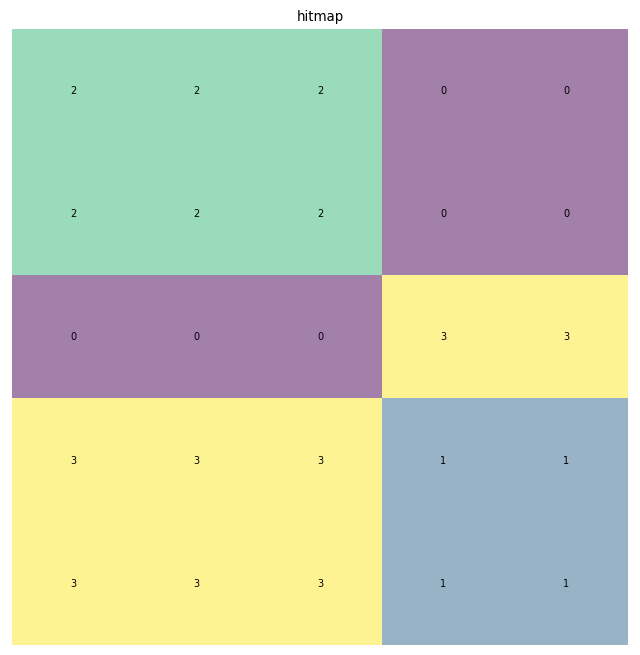

In [89]:
h = sompy.hitmap.HitMapView(8, 8, 'hitmap', text_size=5, show_text=True)
h.show(som)

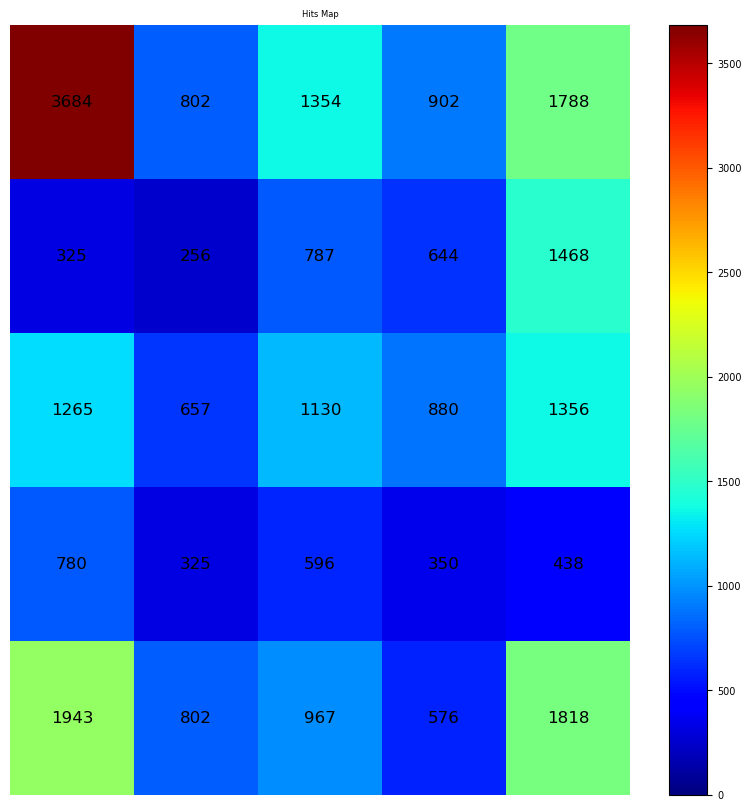

In [90]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=12, logaritmic=False)

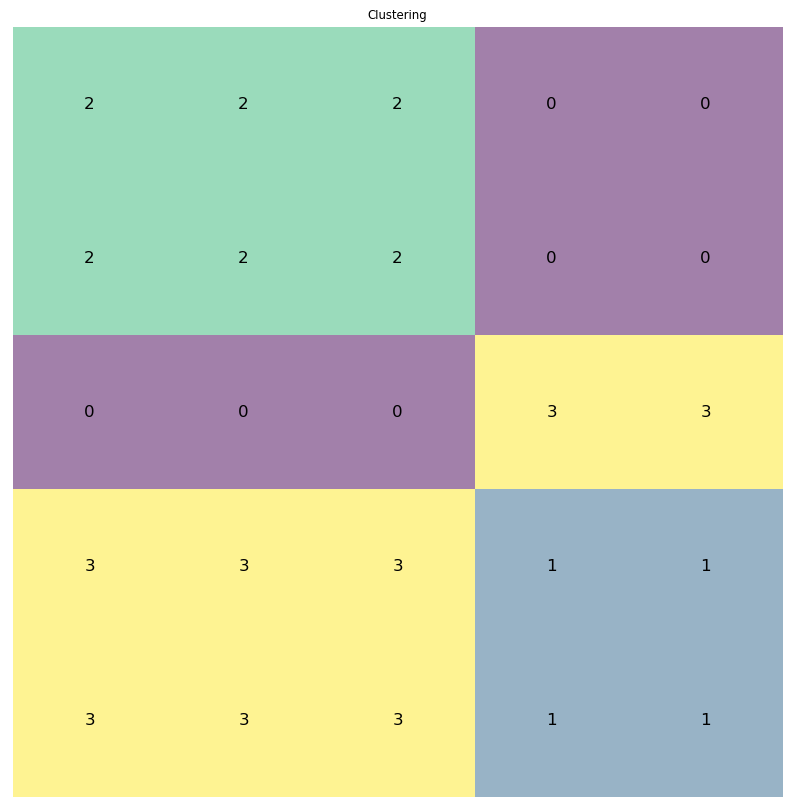

In [91]:
from sompy.visualization.hitmap import HitMapView
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(som, labelsize=12)